In [1]:
import warnings
warnings.filterwarnings("ignore")
import sys, os
sys.path.append(os.path.abspath("../.."))
from configs import GOOGLE_APPLICATION_CREDENTIALS,GCS_BUCKET_NAME,GCS_PROJECT_ID
from google.cloud import bigquery

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
client = bigquery.Client.from_service_account_json(GOOGLE_APPLICATION_CREDENTIALS)

query = """SELECT *
FROM `khangtestdbt.xecupredict.data_done` """
data = client.query(query).to_dataframe()
data.head(1)

,km,origin,body,fuel,brand,age,price
0,105.0,Nhập khẩu,SUV,Dầu,Toyota,8,627000000.0


In [4]:
df = data.copy()

In [5]:
df.head(5)

,km,origin,body,fuel,brand,age,price
0,105.0,Nhập khẩu,SUV,Dầu,Toyota,8,627000000.0
1,110.0,Nhập khẩu,MPV,Khác,Kia,15,200000000.0
2,112.0,Nhập khẩu,Hatchback,Xăng,Hyundai,10,165000000.0
3,112.0,Nhập khẩu,Hatchback,Xăng,Kia,13,85000000.0
4,112.0,Nhập khẩu,Hatchback,Xăng,Kia,14,195000000.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4126 entries, 0 to 4125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   km      4126 non-null   float64
 1   origin  4126 non-null   object 
 2   body    4126 non-null   object 
 3   fuel    4126 non-null   object 
 4   brand   4126 non-null   object 
 5   age     4126 non-null   Int64  
 6   price   4126 non-null   float64
dtypes: Int64(1), float64(2), object(4)
memory usage: 229.8+ KB


In [9]:
df.describe(include="all")

,km,origin,body,fuel,brand,age,price
count,4126.000000,4126,4126,4126,4126,4126.0,4.126000e+03
unique,NaN,2,11,5,30,<NA>,NaN
top,NaN,Trong nước,SUV,Xăng,Toyota,<NA>,NaN
freq,NaN,2190,1680,2281,687,<NA>,NaN
mean,63036.655114,NaN,NaN,NaN,NaN,5.506544,5.742100e+08
std,36189.076577,NaN,NaN,NaN,NaN,3.672843,2.769314e+08
min,105.000000,NaN,NaN,NaN,NaN,0.0,5.000000e+06
25%,35000.000000,NaN,NaN,NaN,NaN,3.0,3.800000e+08
50%,61000.000000,NaN,NaN,NaN,NaN,5.0,5.300000e+08
75%,89000.000000,NaN,NaN,NaN,NaN,8.0,7.290000e+08


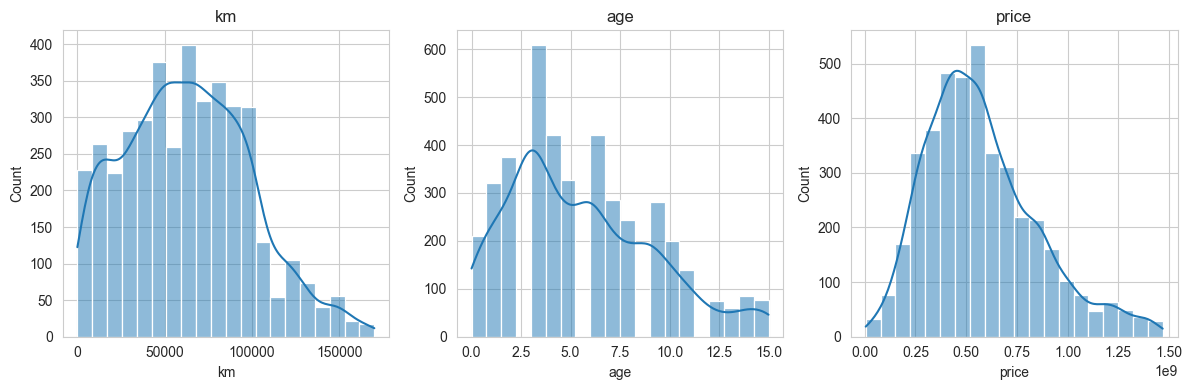

In [23]:
num_cols = df.select_dtypes(include=['int64', 'float64', 'Int64']).columns

plt.figure(figsize=(len(num_cols)*4, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(col)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

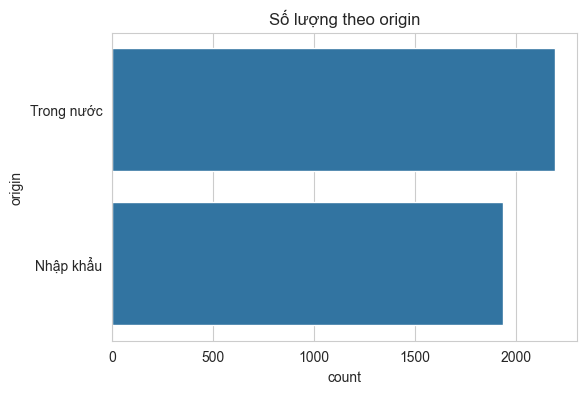

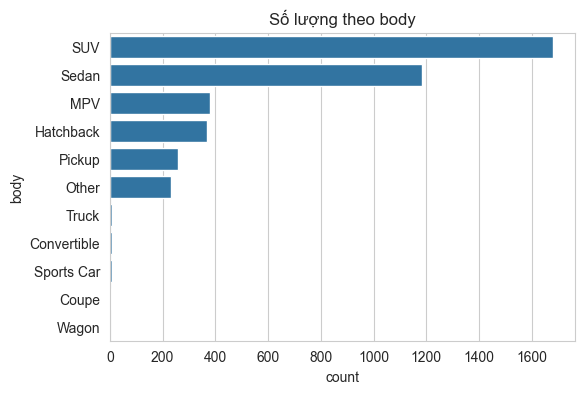

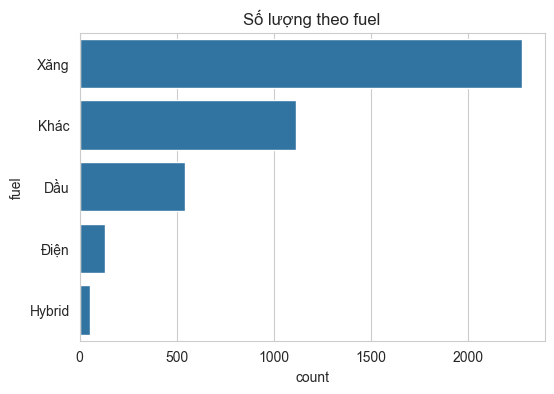

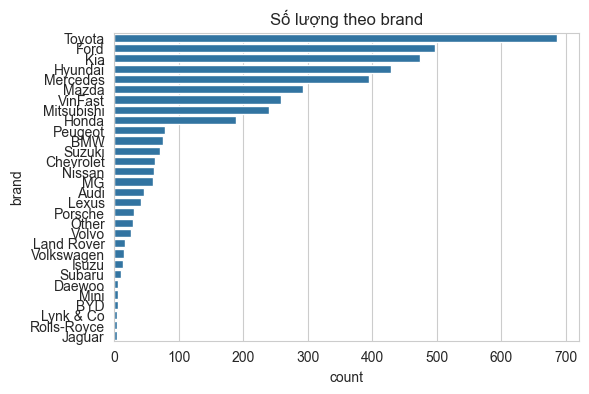

In [24]:
plt.figure(figsize=(8,6))

cat_cols = [col for col in df.select_dtypes(include=['object'])]

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Số lượng theo {col}")
    plt.show()


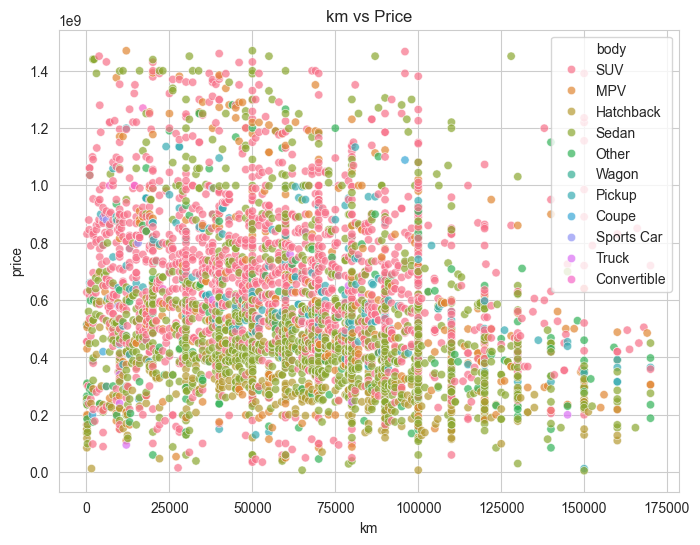

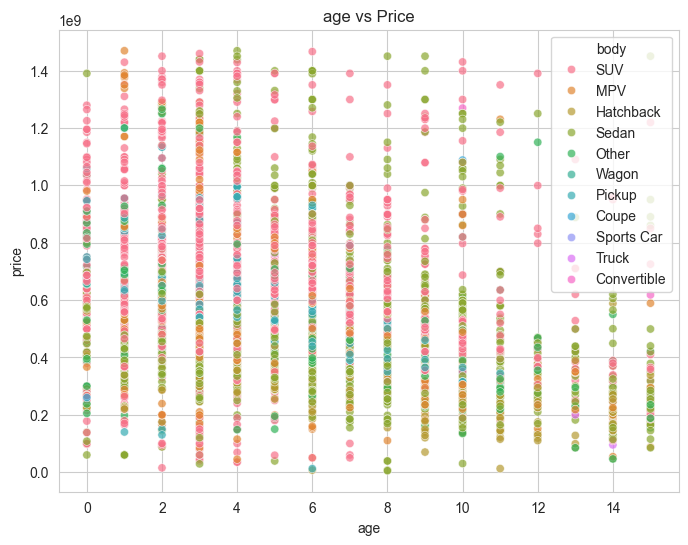

In [28]:
for col in num_cols:
    if col != 'price':
        plt.figure(figsize=(8,6))
        sns.scatterplot(x=col, y='price', hue='body', data=df, alpha=0.7)
        plt.title(f"{col} vs Price")
        plt.show()


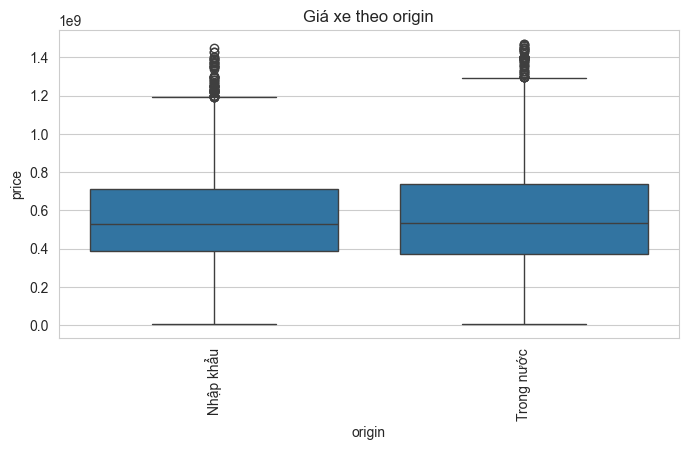

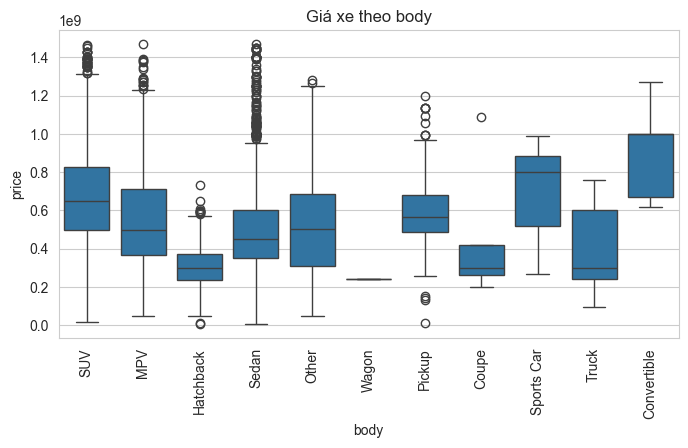

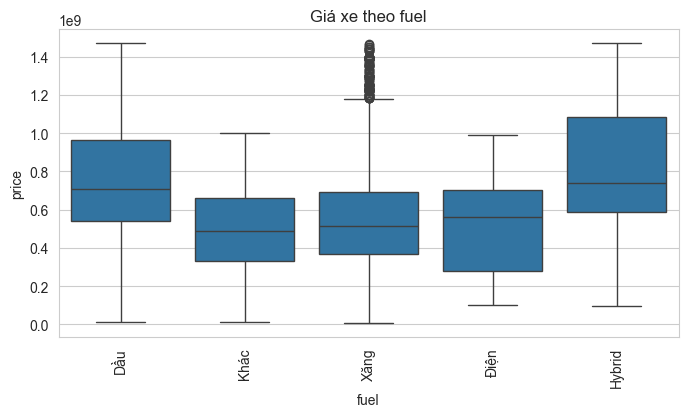

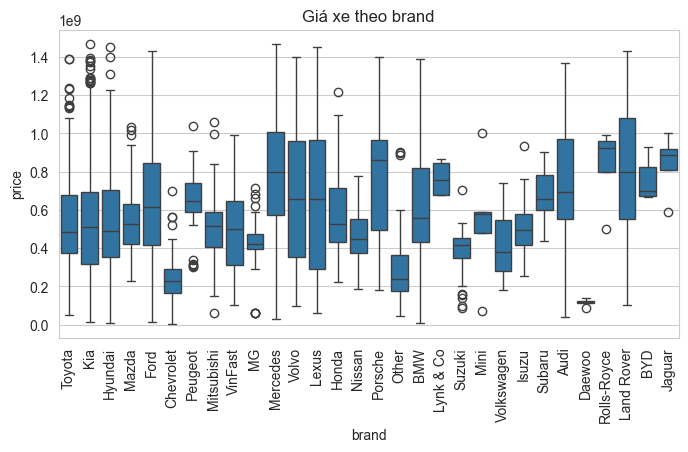

In [29]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f"Giá xe theo {col}")
    plt.xticks(rotation=90)
    plt.show()

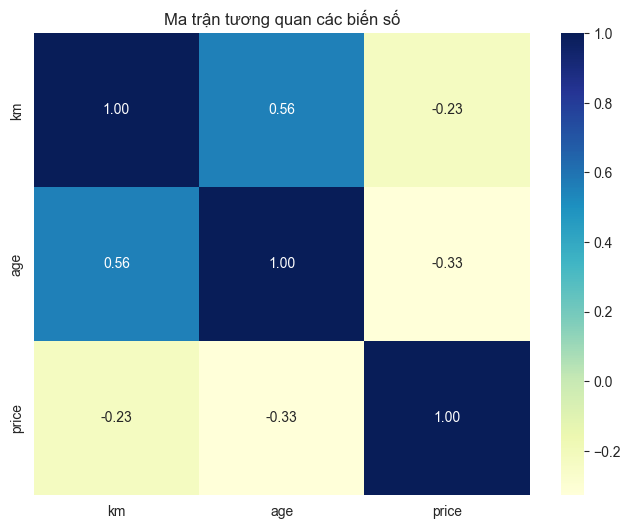

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Ma trận tương quan các biến số")
plt.show()

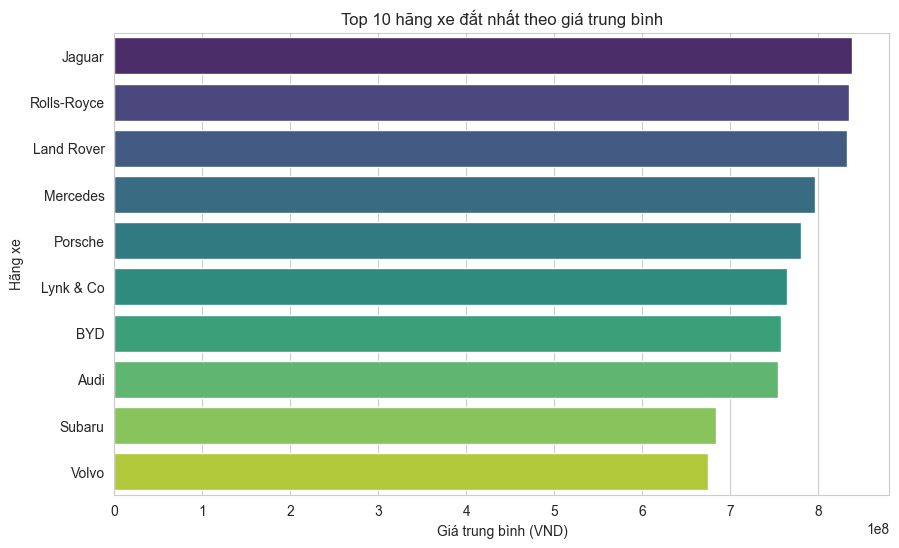

In [30]:
brand_avg_price = df.groupby('brand')['price'].mean().sort_values(ascending=False)

top10_brands = brand_avg_price.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10_brands.values, y=top10_brands.index, palette="viridis")
plt.xlabel("Giá trung bình (VND)")
plt.ylabel("Hãng xe")
plt.title("Top 10 hãng xe đắt nhất theo giá trung bình")
plt.show()

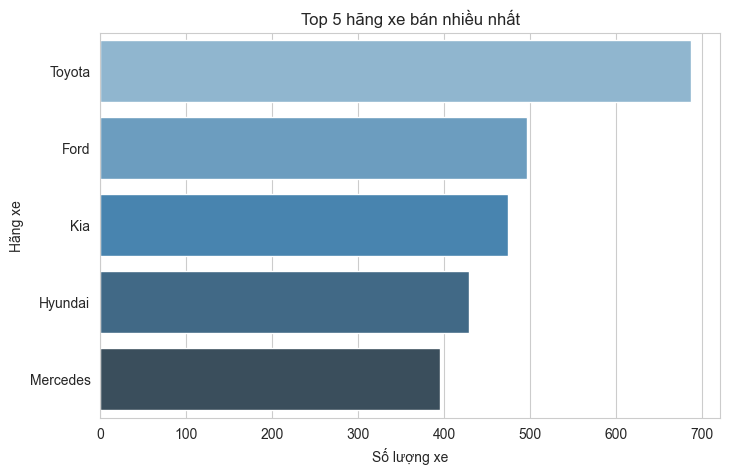

In [33]:
brand_counts = df['brand'].value_counts()

top5_brands = brand_counts.head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top5_brands.values, y=top5_brands.index, palette="Blues_d")
plt.xlabel("Số lượng xe")
plt.ylabel("Hãng xe")
plt.title("Top 5 hãng xe bán nhiều nhất")
plt.show()

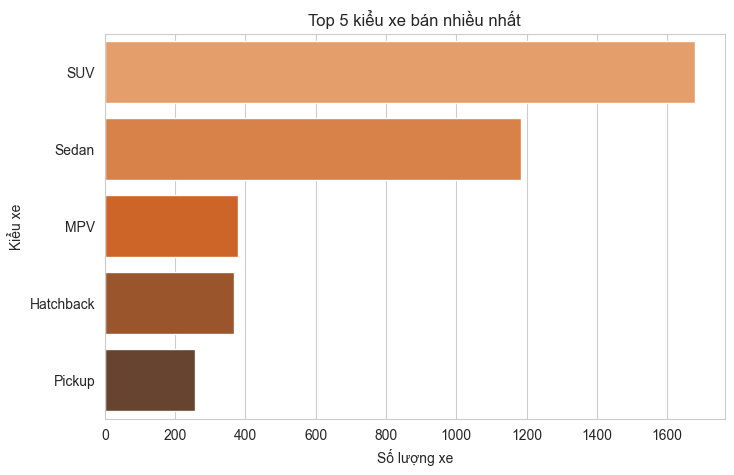

In [34]:
body_counts = df['body'].value_counts()


top5_body = body_counts.head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top5_body.values, y=top5_body.index, palette="Oranges_d")
plt.xlabel("Số lượng xe")
plt.ylabel("Kiểu xe")
plt.title("Top 5 kiểu xe bán nhiều nhất")
plt.show()

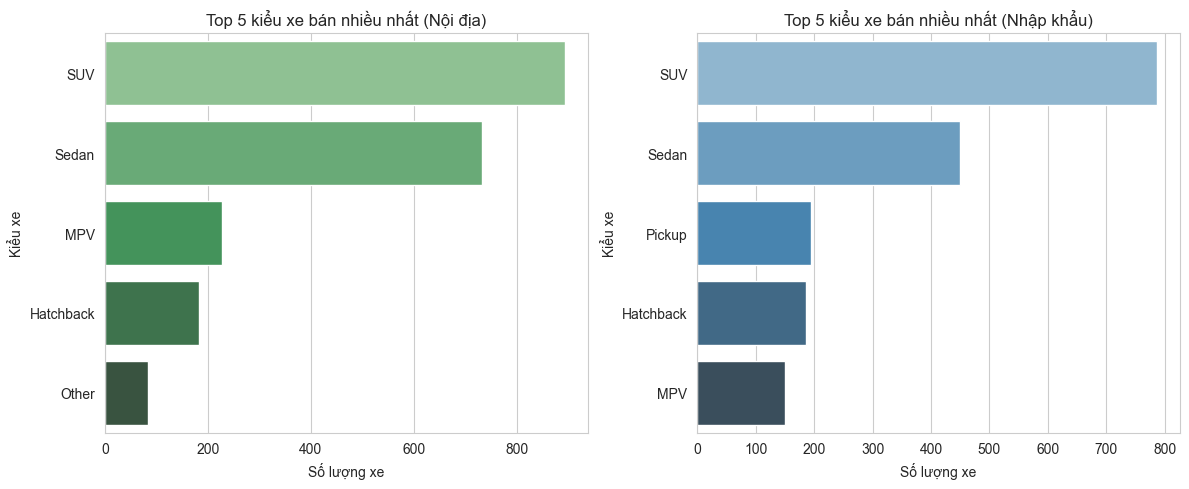

In [40]:
top5_body_local = df[df['origin'] == 'Trong nước']['body'].value_counts().head(5)

top5_body_import = df[df['origin'] == 'Nhập khẩu']['body'].value_counts().head(5)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x=top5_body_local.values, y=top5_body_local.index, palette="Greens_d")
plt.xlabel("Số lượng xe")
plt.ylabel("Kiểu xe")
plt.title("Top 5 kiểu xe bán nhiều nhất (Nội địa)")

plt.subplot(1,2,2)
sns.barplot(x=top5_body_import.values, y=top5_body_import.index, palette="Blues_d")
plt.xlabel("Số lượng xe")
plt.ylabel("Kiểu xe")
plt.title("Top 5 kiểu xe bán nhiều nhất (Nhập khẩu)")

plt.tight_layout()
plt.show()


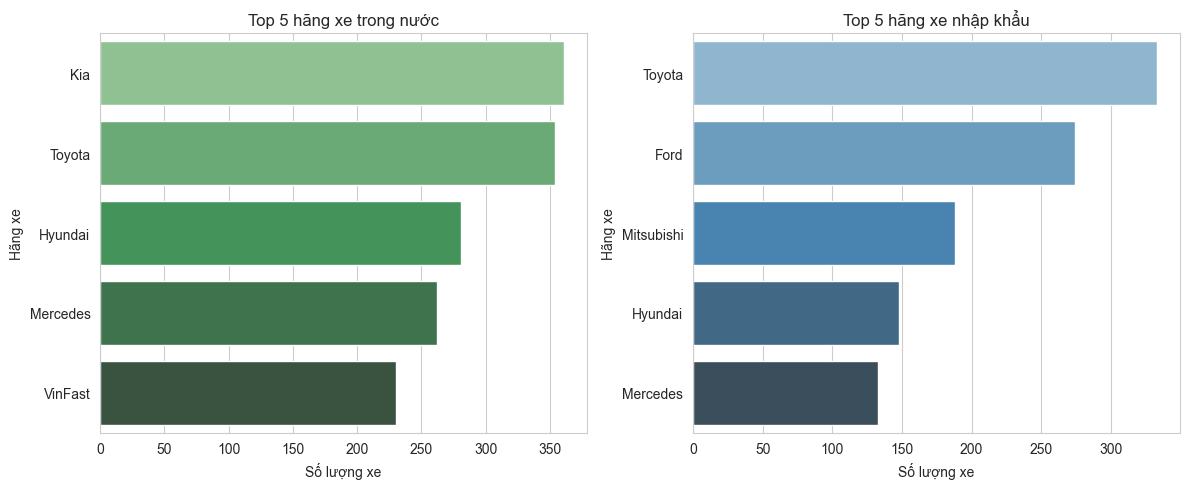

In [37]:
top5_local = df[df['origin'] == 'Trong nước']['brand'].value_counts().head(5)


top5_import = df[df['origin'] == 'Nhập khẩu']['brand'].value_counts().head(5)

plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
sns.barplot(x=top5_local.values, y=top5_local.index, palette="Greens_d")
plt.xlabel("Số lượng xe")
plt.ylabel("Hãng xe")
plt.title("Top 5 hãng xe trong nước")

plt.subplot(1,2,2)
sns.barplot(x=top5_import.values, y=top5_import.index, palette="Blues_d")
plt.xlabel("Số lượng xe")
plt.ylabel("Hãng xe")
plt.title("Top 5 hãng xe nhập khẩu")

plt.tight_layout()
plt.show()

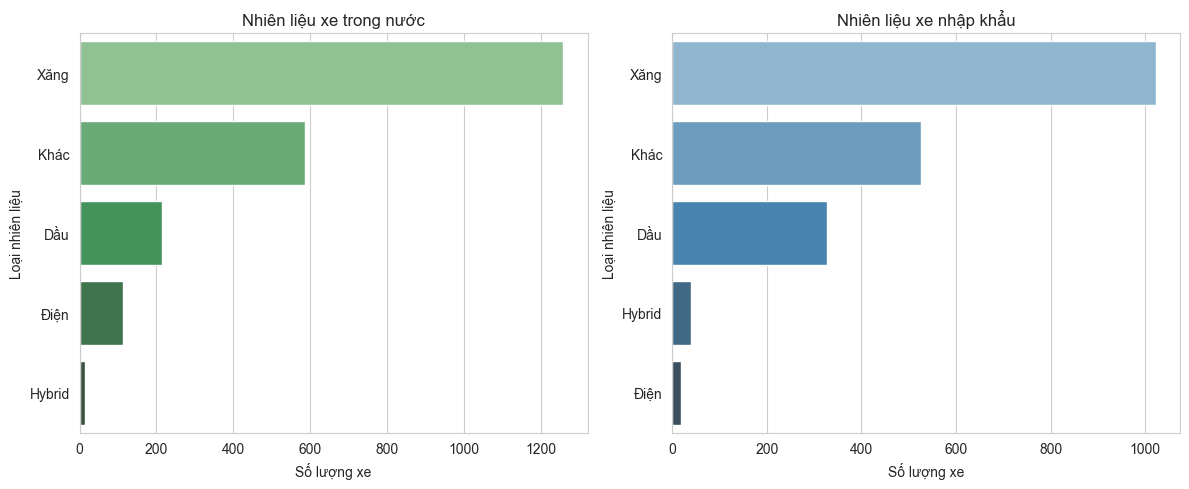

In [39]:
fuel_local = df[df['origin'] == 'Trong nước']['fuel'].value_counts()

fuel_import = df[df['origin'] == 'Nhập khẩu']['fuel'].value_counts()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x=fuel_local.values, y=fuel_local.index, palette="Greens_d")
plt.xlabel("Số lượng xe")
plt.ylabel("Loại nhiên liệu")
plt.title("Nhiên liệu xe trong nước")

plt.subplot(1,2,2)
sns.barplot(x=fuel_import.values, y=fuel_import.index, palette="Blues_d")
plt.xlabel("Số lượng xe")
plt.ylabel("Loại nhiên liệu")
plt.title("Nhiên liệu xe nhập khẩu")

plt.tight_layout()
plt.show()